In [58]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# NTK Beamforming


In [152]:
# import numpy as np
# import h5py
# f = h5py.File('/opt/projects/generally_intelligent/standalone/llms/1_48_bowl_single_angle.mat','r')
# # data = f.get('data/variable1')
# # data = np.array(data) # For converting to a NumPy array

import numpy as np

import scipy.io
mat = scipy.io.loadmat('1_48_tofu_purple_straw_single_angle.mat')

/opt/venv/lib/python3.11/site-packages/scipy/io/matlab/_mio.py:226: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


In [153]:
aperture_permutation = [22,21,20,40,23,41,45,42,44,43,46,17,16,47,12,19,18,13,14,15,48,49,53,50,52,51,8,54,55,10,11,4,5,6,7,9,3,2,1,0,39,38,37,36,32,33,34,35]
len(aperture_permutation)

48

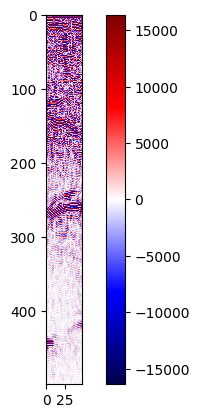

In [154]:
plt.imshow(mat['RcvData'][0,0][:500,v,0], cmap="seismic")
plt.colorbar()
plt.show()

In [156]:
from imaging.demodulate import demodulate_rf_to_iq

transducer_frequency = 2.5e6 # default verasonics is 2.5MHz
freq_sampling = 4 * transducer_frequency
iq_signals, freq_carrier = demodulate_rf_to_iq(
    mat['RcvData'][0,0][:500,aperture_permutation,-1], freq_sampling, freq_carrier=transducer_frequency
)

freq_carrier

2500000.0

In [157]:
N = 220
Nz = 200
dx0 = 2.95e-4

# Generate 1D arrays for x and z
x = np.linspace(-(N // 2) * dx0, (N // 2) * dx0, N)
z = np.linspace(0, Nz * dx0, Nz)

# Create 2D meshgrid for x and z
X, Z = np.meshgrid(x, z)

N, Nz, dx0

(220, 200, 0.000295)

In [158]:
from imaging.beamform import beamform_delay_and_sum

beamformed_signal = beamform_delay_and_sum(
    iq_signals,
    X,
    Z,
    freq_sampling,
    freq_carrier,
    pitch=dx0,
    tx_delays=np.zeros(nelements),
)

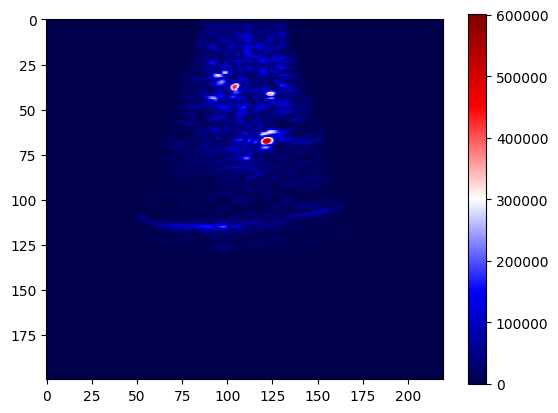

In [159]:
plt.imshow(np.abs(beamformed_signal), cmap="seismic")
plt.colorbar()
plt.show()